# EEG practical lab - Neurociencias & IA
#### Tutores: Mg. Nicolás Bruno y Mg. Tomás D'Amelio

## Consigna
En la clase de hoy van a tener que realizar  el **análisis desde cero de un set de datos de EEG** hasta obtener resultados reportables.

## Dataset

El set de datos lo van a poder descargar de acá: 

https://openneuro.org/datasets/ds003690/versions/1.0.0

El *dataset* contiene datos de 75 participantes e incluye señales de EEG, ECG y pupilometría mientras estos participantes realizan:
- una tarea pasiva
- una tarea simple de tiempos de reacción
- una tarea de Go/No-go.
  
Nosotros nos vamos a enfocar en la tarea Go/No-go.
En esta tarea, dependiendo la frecuencia de un determinado estimulo sonoro que se le presentaba, el participante tenía que apretar un botón (Go) o no apretar un botón (No-Go). El 80 % de los ensayos eran *ensayos cue-go*, mientras que el 20% eran *ensayos cue-no-go.*


## MNE python

Para poder realizar prácticamente todos los análisis van a tener que usar la librería de Python MNE, destinada al análisis de EEG. [ACÁ](https://mne.tools/stable/index.html) van a poder encontrar todo la documentación de esta librería, con sus funciones y qué hacen las mismas. También van a encontrar tutoriales que explican paso a paso cómo hacer ciertas procedimientos de análisis de datos.


## Resolución
Este notebook va ir guiandolos en qué tienen que ir haciendo durante el practical. Van a encontrar celdas de texto que los introducen un poco a lo que tienen que hacer y celdas con código incompleto (e.g. "...") que ustedes van a tener que completar. En algunos casos directamente encontrarán celdas vacías para que sean completadas en su totalidad por ustedes.

Cualquier consulta pueden consultarnos a nuestros mails:
- nicobruno92@gmail.com
- dameliotomas@gmail.com

-----------------------------------------

### Importamos las librerias que vamos a usar ###

Esta linea es para que los gráficos aparezcan fuera de jupyter ya que los gráficos de MNE  son interactivos


In [1]:
%matplotlib qt 

Algunas librerías que podrían resultar de utilidad.\
Recuerden que si no tienen alguna de la siguientes librerias pueden bajarlas desde "Anaconda Prompt (anaconda3)", utilizando el comando "pip install NOMBRE_DE_LIBRERIA".\
E.g. pip install pandas.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mne
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report

c:\Users\dadam\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preprocesamiento
Lo primero que vamos a hacer es preprocesar los datos de cada sujeto. Para eso nosotros armamos un _pipeline_ (serie de pasos) clásico de preprocesamiento de EEG parecido al que vieron durante la clase de EEG.



## Descargar la data en BIDS format

Vamos a descargar la data de una base de datos llamada Open Neuro que es de Open Access.
El dataset que vamos a usar es el siguiente:

https://openneuro.org/datasets/ds003690/download

Este dataset se encuentra en un formato que se llama Brain Imaging Data Structure (BIDS), que se utiliza para que todos estos datasets de acceso público se manejen de forma estandarizada, de forma tal que sea mas fácil compartir información y que otros la puedan utilizar.

**Descargar el set de datos y asignar en la variable "bids_root" el path donde se encuentran tus datos descargados.**
E.g. Si sus datos se encuentran en '/Users/dadam/data_practical_lab/' deberán ejecutar el sigueinte comando:

bids_root = '/Users/dadam/data_practical_lab/'

In [6]:
bids_root = '/Users/dadam/data_practical_lab/'

La librería MNE-BIDS tiene una función llamada "make_report()" que resume la información del dataset sobre:

a) Descripción general del set de datos (guardada en el archivo "dataset_description.json")

b) Información de los participantes (guardada en el archivo "participants.tsv file")

c) Información de los datos de EEG

In [7]:
print(make_report(bids_root))

Summarizing participants.tsv /Users/dadam/data_practical_lab/participants.tsv...
The participant template found: comprised of 15 male and 60 female participants;
handedness were all unknown;
ages ranged from 19.0 to 70.0 (mean = 42.52, std = 19.08)
 The EEG, ECG and pupil data from young and older adults: rest and auditory cued
reaction time tasks dataset was created by Maria J. Ribeiro, and Miguel Castelo-
Branco and conforms to BIDS version v1.2.1. This report was generated with MNE-
BIDS (https://doi.org/10.21105/joss.01896). The dataset consists of 74
participants (comprised of 15 male and 60 female participants; handedness were
all unknown; ages ranged from 19.0 to 70.0 (mean = 42.52, std = 19.08)) .


C:\Users\dadam\AppData\Local\Temp/ipykernel_20652/3390368180.py:1: RuntimeWarning: No *scans.tsv files found. Currently, we do not generate a report without the scans.tsv files.
  print(make_report(bids_root))


## Cargar BIDS data
Acá van a tener que buscar la función de MNE para cargar/leer (_read_ en inglés) la data para el tipo de archivo que vamos a usar. \
El tipo de archivo en MNE se llama BIDS.\
Una vez identificada la función van a usarla para leer el archivo de un sujeto.

In [8]:
# Solo nos va a interesar la data de EEG
datatype = 'eeg'
suffix = 'eeg'

# Nombre que le vamos a poenr a la tarea (GO-NOGO)
task = 'gonogo' 

# Los sujetos tenian 2 _runs_ por task pero solo vamos a usar el 1
run = '1'

# Sujeto que queremos utilizar
# Vamos a empezar utilizando el 'sub-AB12'
subject = 'AB12'

bids_path = BIDSPath(subject=subject, task=task, run = run,
                     suffix=suffix, datatype=datatype, 
                    root=bids_root)

In [9]:
display(bids_path) # display es como print pero se ve más lindo en jupyter :)

BIDSPath(
root: /Users/dadam/data_practical_lab
datatype: eeg
basename: sub-AB12_task-gonogo_run-1_eeg)

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Leer archivo BIDS</li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li> <i>Usar la funcion "read_raw_bids" de la libreria MNE bids</i></li>
    <li> <i>Pasar "bids_path" como argumento de dicha función</i></li>
    <li> <i>Asginar los datos leidos a la variable "raw"</i></li>
    </ul>
</div>

In [10]:
# Leer el archivo crudo pasando el path que acabamos de crear al archivo
raw = read_raw_bids(bids_path=bids_path, verbose = False)

C:\Users\dadam\AppData\Local\Temp/ipykernel_20652/1511500575.py:2: RuntimeWarning: Unknown types found, setting as type EEG:
heog: ['HEO']
pupil: ['R-Dia-X-(mm)', 'R-Dia-Y-(mm)']
veog: ['VEO']
  raw = read_raw_bids(bids_path=bids_path, verbose = False)
C:\Users\dadam\AppData\Local\Temp/ipykernel_20652/1511500575.py:2: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = read_raw_bids(bids_path=bids_path, verbose = False)
C:\Users\dadam\AppData\Local\Temp/ipykernel_20652/1511500575.py:2: RuntimeWarning: Not setting position of 1 ecg channel found in montage:
['EKG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_bids(bids_path=bids_path, verbose = False)
C:\Users\dadam\AppData\Local\Temp/ipykernel_20652/1511500575.py:2: RuntimeWarning: Other is not an M

### Seteamos montage según condiciones experimentales

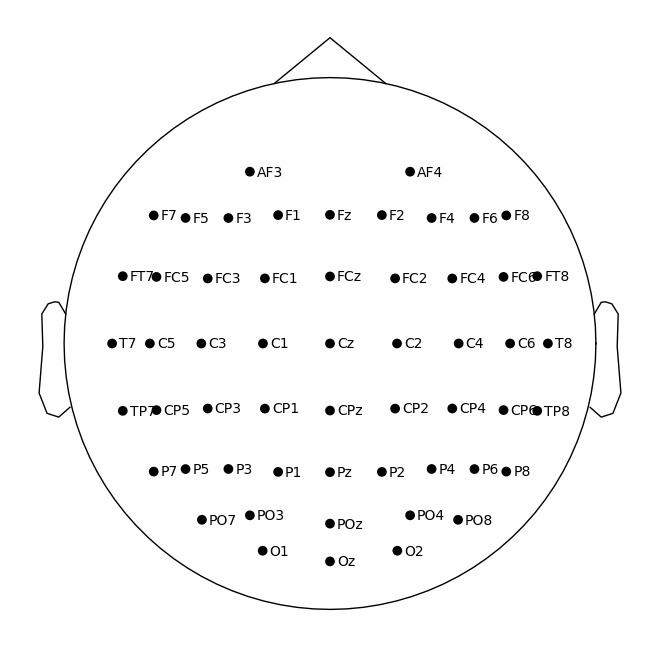

In [11]:
# Elimino canales que no son de EEG
raw = raw.drop_channels(['M1', 'M2', 'PO5', 'PO6', 'CB1', 'CB2', 'R-Dia-X-(mm)', 'R-Dia-Y-(mm)'])
# Seteo el montage de acuerdo a las condiciones experimentales (en el trabajo usaron Biosemi de 64 canales)
raw.set_montage('biosemi64')
raw.plot_sensors(show_names=True)

#### Vamos a usar el método "info"  para ver un poco que hay adentro de nuestro archivo que acabamos de cargar.
#### Esto nos va a decir cuántos canales tenemos y de qué tipo, los nombres de los canales, si ya tiene aplicado algun filtro, cual fue la frequencia de sampleo, etc.

In [12]:
display(raw.info) 

<Info | 10 non-empty values
 bads: []
 ch_names: AF3, AF4, F7, F5, F3, F1, Fz, F2, F4, F6, F8, FT7, FC5, FC3, ...
 chs: 55 EEG, 2 EOG, 1 ECG
 custom_ref_applied: False
 dig: 58 items (3 Cardinal, 55 EEG)
 highpass: 0.0 Hz
 line_freq: 50.0
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 58
 projs: []
 sfreq: 500.0 Hz
 subject_info: 11 items (dict)
>

In [13]:
raw.info['sfreq']  # Para ver la frequencia de sampleo (i.e. cantidad de registros por segundo) 

500.0

In [14]:
raw.info['bads']  # Para ver si algun canal fue marcado como "malo" (i.e. defectuoso) por parte de los investigadores

[]

In [15]:
raw.ch_names[:10] # el nombre de los primeros 10 canales

['AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6']

In [16]:
len(raw.info['chs']) #cuantos canales hay

58

## Downsampling la data

El downsampling consiste en reducir la cantidad registros por segundo que queremos que tenga nuestra data. Esto lo hacemos para agilizar nuestros análisis ya que para lo que vamos a hacer no nos interesa que la frecuencia de sampleo sea tan alta.

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>"Downsamplear" a la mitad de Hz (i.e. la mitad de la cantidad de puntos por segundo) en relación a la data orginal. Si no recuerdan cuánto era la frecuencia de sampleo. está en el método "info" bajo "sfreq"</li>
    </ul>
</div>

In [17]:
# Carga de datos a memroia (requeria para algunas operaciones)
raw.load_data()  
# Downsamplear la data a la mitad
raw.resample(250) 

<RawEEGLAB | sub-AB12_task-gonogo_run-1_eeg.set, 58 x 126090 (504.4 s), ~55.9 MB, data loaded>

## Visualizar la data cruda

Es muy importante visualizar la data cruda para ver si hay algun canal cuya señal esté "mala"/ruidosa. Tómense unos minutos para inspeccionar visualmente los datos de este sujeto.

MNE nos permite generar visualizaciones interactivas en donde uno puedo marcar los canales como "malos" (se ponen en gris) y cuando se cierra el _plot_ (apretando ESC) va a quedar guardado automaticamente ese canal como malo. 

_Disclaimer_: cuando creen un gráfico si o si van a tener que cerrarlo para poder seguir bien con el codigo

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Ver si hay canales malos</li>
    <li>Marcar canales malos (si lo hay)</li>
    <li>Ver si pueden indentificar dónde hay pestaneos y movimientos oculares</li>
    <li>Identificar los eventos en el plot (son lineas verticales de colores)</li>
    </ul>
</div>

Los canales malos los vamos a descartar (_dropear_) más adelante

Using matplotlib as 2D backend.


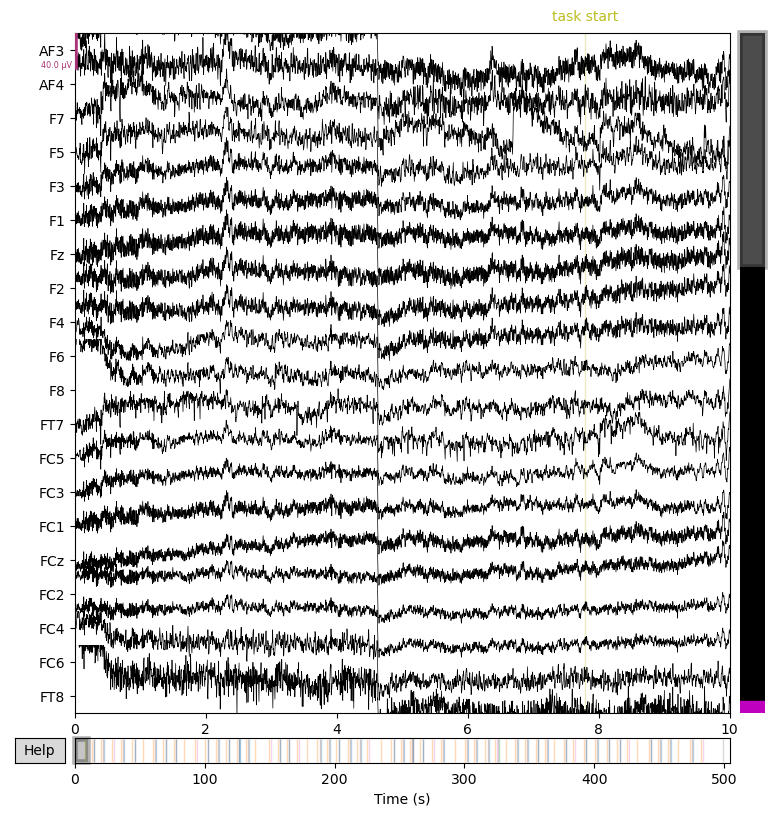

In [18]:
raw.plot()

## Filtrado

Ahora vamos a filtrar la data. Esto consiste en descartar las frecuencias que están por abajo o por encima de nuestro interés.
Vamos a aplicar un filtro para todas las frecuencias por encima de 1Hz a esto se lo llama High-pass filter (filtro pasa altos) y todas las frecuencias por debajo de 40Hz Low-pass filter (filtro pasa bajos)

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Filtrar la data cruda entre 1Hz y 40Hz</li>
    </ul>
</div>

In [19]:
# definir valor high pass filter
hpass = 1
# definir valor low pass filter
lpass = 40

# filtrar data cruda
# buscar en la documentacion
# van a tener que utilizar el metodo de mne para filtrar la data 
raw_filtered = raw.filter(hpass,lpass)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.2s finished


Ahora vamos a vamos realizar un gráfico de frecuencia (Power Spectral Density, PSD). Van a poder ver como por fuera de nuestros cortes (dado por los filtros) el poder de la señal cae. 

Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


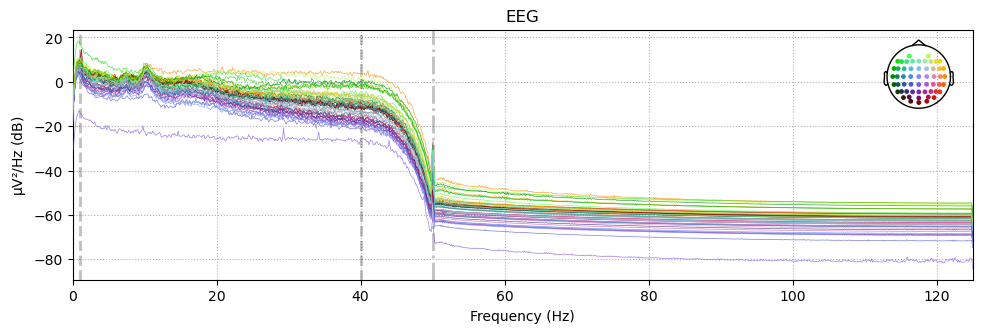

In [20]:
raw_filtered.plot_psd()

## Definir eventos
Una vez que tenemos la data  filtrada el siguiente paso va a ser poder cortar nuestra data en épocas. O sea, vamos a tener que seleccionar eventos de interés (e.g.: estimulos, respuestas, etc) y luego cortar la data cruda alrededor de este evento. En este caso nuestros eventos van a ser los eventos presentados, ya sean go o no-go. Por ende, lo primero que vamos a hacer ahora es buscar estos eventos en la señal. Siempre que trabajamos con este tipo de señales va a ver un canal que esta destinado a marcar en que momento de la señal se presento el evento, y a estas marcas se las llama _triggers_. En el caso que haya que encontrar los eventos de un canal de estimulos vas a tener que usar la funcion mne.find_events()

Para este dataset los estímulos ya fueron pasados a anotaciones en la señal.\
Pueden verlas ploteando la raw data. En este caso la función es mne.events_from_annotations()

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Encontrar eventos</li>
    </ul>
     <br>
    <i>tips</i>:
    <ul>
    <li> <i>Usar función mne.events_from_annotations()</i></li>
    <li> <i>Esta función devuelve dos variables así que van a tener que dar dos variables para asignar (e.g. "events" y "event_id")</i></li>
    </ul>
</div>

In [21]:
# usar funcion events_from_annotations
events, event_id = mne.events_from_annotations(raw = raw_filtered)

Used Annotations descriptions: ['button press', 'cue', 'error feedback tone', 'error of commission', 'go', 'no-go', 'task end', 'task start']


Esta funcion devuelve dos variables, en este caso "events" y "event_id".\
_Events_ contiene la informacion sobre todos los triggers (el primer número hace referencia al tiempo de presentación del evento en puntos de registro, mientras que el último número refiere al código asignado a cada tipo de evento).\
Y _event_id_ es un diccionario que contiene el id de cada evento con su nombre.

In [22]:
print(events[:10]) #solo los 10 primeros eventos
print(event_id)

[[1946    0    8]
 [3277    0    2]
 [3689    0    5]
 [3758    0    1]
 [5030    0    2]
 [5440    0    5]
 [5586    0    1]
 [7116    0    2]
 [7544    0    6]
 [8884    0    2]]
{'button press': 1, 'cue': 2, 'error feedback tone': 3, 'error of commission': 4, 'go': 5, 'no-go': 6, 'task end': 7, 'task start': 8}


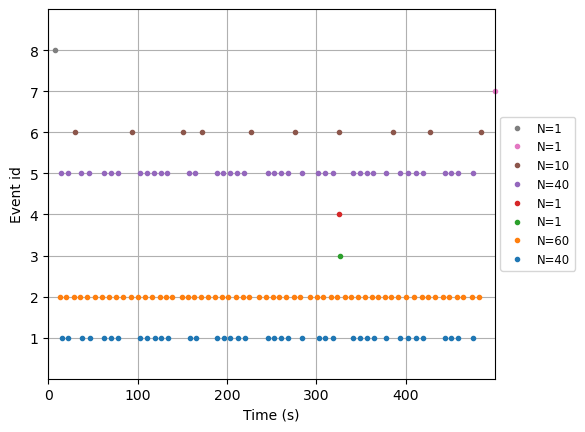

In [23]:
# visualizar los eventos
mne.viz.plot_events(events, raw_filtered.info['sfreq'])

Para este ejercicio los únicos eventos que nos van a interesar son los Go y No-Go. 

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Crear una lista con id de los eventos a incluir</li>
    <li>Usar la funcion pick_events para seleccionar los eventos de interés</li>
    <li>Crear un diccionario para los eventos y sus id a incluir</li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li> <i>Revisar el diccionario events_id para encontrar los id de cada evento</i></li>
    </ul>
</div>

In [24]:
# lista con los id de los eventos de interés ("Go" y "No-Go") 
include = [5, 6]

# events to include using pick events
events_included = mne.pick_events(events = events, include = [5,6])

# diccionario de eventos a incluir
event_id_included  ={'go': 5, 
                    'no-go': 6}

## Crear Épocas

Ahora que ya tenemos los eventos identificados con sus IDs, podemos crear nuestras épocas alrededor de estos. 
De este modo, tenemos que definir desde qué tiempo hasta qué tiempo es la duración de cada una nuestras épocas (importante: el tiempo "0" corresponde a la referencia de la marca del evento). Además, hay que definir qué parte de la señal se utilizará como linea de base (_baseline_). Dicho baseline (que generalmente es un tiempo anterior a cada ensayo) sería restado a la señal epocheado, de forma tal de mitigar cambios en las señales de EEG que no estén relacioandas con la pregunta experimental.


<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Definir tiempo mínimo de época a los -200ms</li>
    <li>Definir tiempo máximo de época a los 800ms</li>
    <li>Definir baseline de -200ms a 0ms</li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li> <i>El tiempo negativo indica que es anterior al evento.</i></li>
    <li> <i>En mne el tiempo va en segundos no en milisegundos (ms)</i></li>
    </ul>
</div>

In [25]:
# definir tiempo minimo
tmin = -0.2
# definir tiempo maximo
tmax = 0.8
# definir baseline
baseline = (-0.2,0)

Una vez que definimos los tiempos de las épocas ya podemos "epoquear" (i.e. extraer ventanas de interés de la señal continua de EEG). Los eventos que nos van a interesar para este análisis son solo los "Go" y "No-Go".

Una parte muy importante del preprocesado es el descartar épocas malas. Normalmente es recomendable utilizar una combinación de algoritmos de detección de épocas malas e inspección visual de las épocas. En MNE podemos setear un criterio para _rejectear_ (descartar) las épocas que superan un determinado cierto umbral.

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Epoquear la data cruda filtrada utilizando los tiempos predifinidos</li>
    <li>Epoquear solo para los eventos Go y No-Go</li>
    <li>Pasar a la función Epochs el criterio de rejecteo predifinido</li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li> <i>Vas a tener que usar la funcion mne.Epochs</i></li>
    <li> <i>En mne el tiempo va en segundos no en milisegundos (ms)</i></li>
    </ul>
</div>

In [26]:
#criterio de rejecteo predifinido
reject_criteria = dict(eeg= 200e-6, eog=200e-6) 


epochs = mne.Epochs(raw_filtered, events = events_included, event_id = event_id_included, 
                    tmin = tmin, tmax = tmax, baseline=baseline, reject = reject_criteria) 

Not setting metadata
50 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [27]:
print(epochs)

<Epochs |  50 events (good & bad), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~84 kB, data not loaded,
 'go': 40
 'no-go': 10>


## Inspección visual de épocas

Como dijimos, para _rejectear_ épocas se utiliza un critrio e inspección viusal. Previamente seteamos los criterio para _rejecteo_ y las marcamos al epoquear. En este caso toca realizar la inspección visual de las mismas.

Para esto una vez ploteado van a ir scrolleando todas las épocas y marcando todas las que ustedes consideren malas. Al finalizar de scrollear todas, con ESC salen y se guardan las épocas que marcaron como malas y les va a indicar en base a que electrodos fueron marcadas (esto sirve por si ven que son todas por un solo electrodo podrían descartar el electrodo así no pierden tantas épocas)

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Realizar la inspección visual de todas las épocas</li>
    <li>Marcar las épocas malas (en caso que existieran)</li>
    <li>Marcar canales malos. En caso que todos los canales estuvieran bien, de todos modos seleccionar uno de los canales (haciendo click en el canal verán que se pone de un color gris mas claro) para que luego podamos practicar interpolar canales</li>
    </ul>
</div>

Using data from preloaded Raw for 50 events and 251 original time points ...
    Rejecting  epoch based on EOG : ['HEO']
    Rejecting  epoch based on EEG : ['F7']
2 bad epochs dropped
Using data from preloaded Raw for 20 events and 251 original time points ...


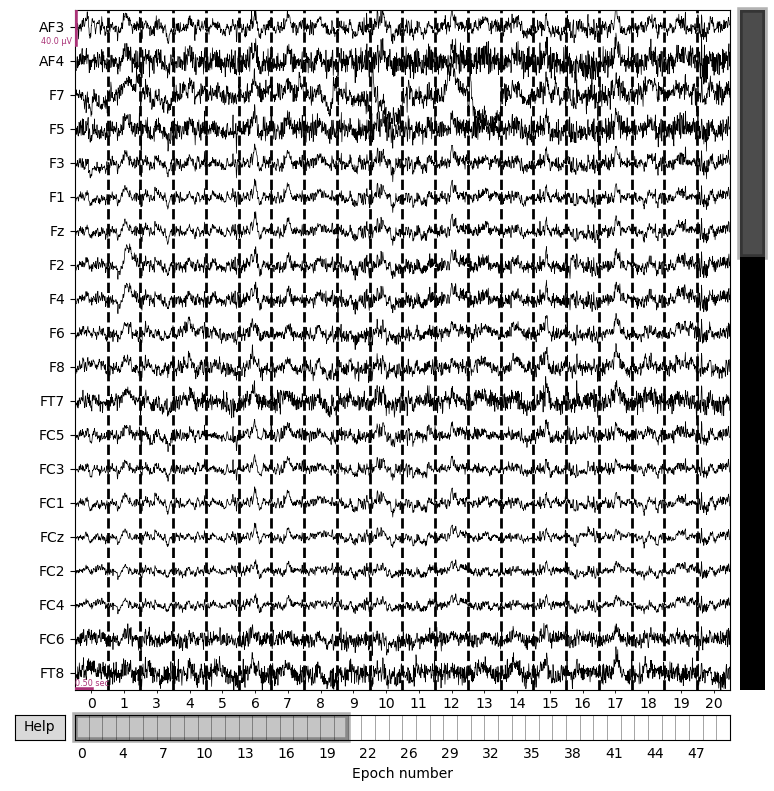

In [28]:
epochs.plot()

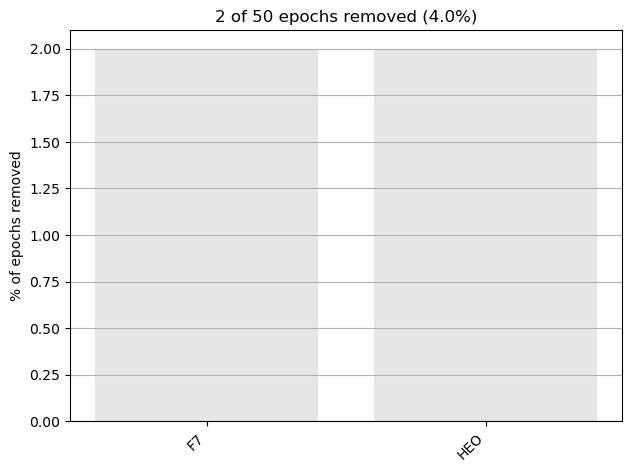

In [29]:
epochs.drop_bad()  # remover las epocas malas
epochs.plot_drop_log() #plotear que épocas dropeamos y bajo que condiciones

In [30]:
print(epochs) # ahora deberiamos tener tantas epocas menos como las que dropeamos

<Epochs |  48 events (all good), -0.2 - 0.8 sec, baseline -0.2 – 0 sec, ~84 kB, data not loaded,
 'go': 39
 'no-go': 9>


## Guardar épocas
Es conveniente ir guardando lo que vamos haciendo así no se pierde. Ahora que ya tenemos las épocas limpias vamos a guardarlas.

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Guardar las épocas</li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li>Utilizar el método "save" para guardar las épocas<i></i></li>
    <li>El path en el que se guardarán las épocas es "epochs_fname"<i></i></li>
    </ul>
</div>

In [28]:
epochs_fname = bids_path.copy().update(suffix='epo', check=False)
epochs.save(epochs_fname, overwrite=True)

Using data from preloaded Raw for 1 events and 251 original time points ...
Using data from preloaded Raw for 48 events and 251 original time points ...


/var/folders/3p/z_m37csj5cs4hp5x2z1hsfrc0000gq/T/ipykernel_44766/1583394623.py:2: RuntimeWarning: This filename (/Users/nicobruno/Downloads/practical_lab/sub-AB12/eeg/sub-AB12_task-gonogo_run-1_epo) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(epochs_fname, overwrite=True)


## ICA

In [31]:
# Correr directamente este bloque de código que permite identificar componentes que pudieran ser artefactos a través del método ICA

n_components = 0.99  
method = 'fastica'
max_iter = 512 
fit_params = dict(fastica_it=5)
random_state = 42

ica = mne.preprocessing.ICA(n_components=n_components,
                            method=method,
                            max_iter=max_iter,
                            random_state=random_state)

ica.fit(epochs)

Fitting ICA to data using 55 channels (please be patient, this may take a while)
Using data from preloaded Raw for 48 events and 251 original time points ...


C:\Users\dadam\AppData\Local\Temp/ipykernel_20652/1164677631.py:14: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Selecting by explained variance: 28 components
Using data from preloaded Raw for 48 events and 251 original time points ...
Fitting ICA took 1.1s.


Method,fastica
Fit,57 iterations on epochs (12048 samples)
ICA components,28
Explained variance,99.1 %
Available PCA components,55
Channel types,eeg
ICA components marked for exclusion,—


Vamos a plotear primero las topologias para ver como son los componentes identificados. Los componentes oculares en general tienen un gran componente frontal

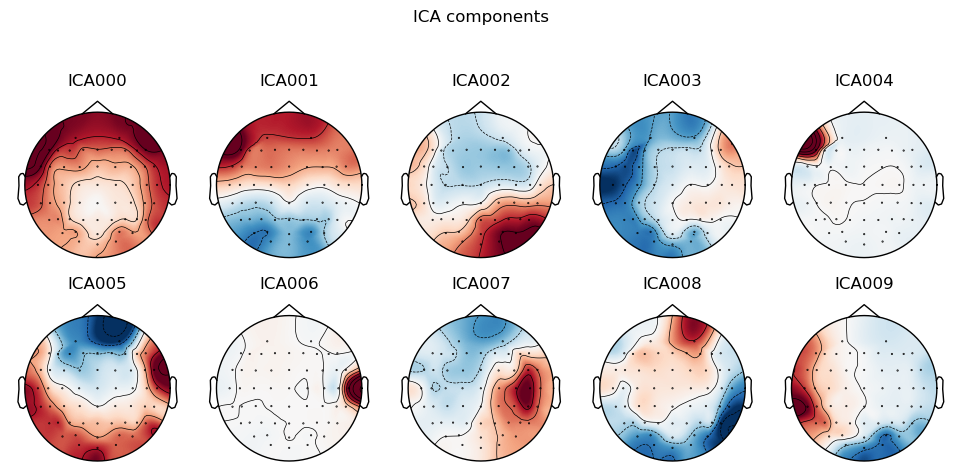

In [30]:
ica.plot_components(inst = epochs, picks=range(10))

Ahora para terminar de estar seguros estos artefactos eran oculares o cardíacos vamos a plotear las sources (i.e. fuentes) que nos muestra cómo se ven esos componentes en la señal. Hay que ver ahora si tienen forma de componente ocular o de cardíaco.

Using data from preloaded Raw for 48 events and 251 original time points ...
Using data from preloaded Raw for 48 events and 251 original time points ...
Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated


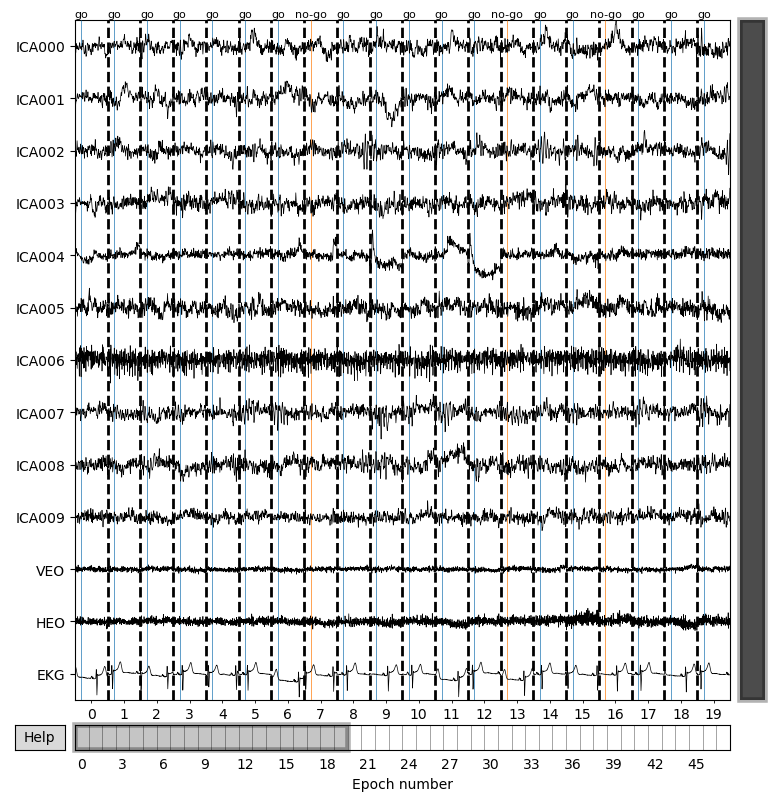

In [32]:
ica.plot_sources(epochs, block=False, picks =range(10))

## Interpolar canales malos

Ahora vamos a interpolar los canales que a lo largo del preprocesamiento fuimos marcando como malos. Esto significa que vamos a tratar de recrear estos canales a partir de la información de los canales vecinos. 

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Interpolar canales malos</li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li> <i>Usar el método interpolate_bads()</i></li>
    </ul>
</div>


In [33]:
# epochs interpolated
epochs.load_data()
epochs_interpolate = epochs.interpolate_bads()

Using data from preloaded Raw for 48 events and 251 original time points ...


C:\Users\dadam\AppData\Local\Temp/ipykernel_20652/2286860712.py:3: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  epochs_interpolate = epochs.interpolate_bads()


## Rereferenceo a _grand average_ de los electrodos

Los distintos sistemas de EEG utilizan diferentes referencias para calcular los voltajes. Por ejemplo, una referencia puede ser electrodos en los mastoides, en los lóbulos de las orejas o a algun electrodo del cuero cabelludo. Por esto mismo es un standard aplicar un "rereferenceo" en algún punto del preprocesado. En este caso vamos a rereferencear al promedio de todos los electrodos.

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li>Rereferencear a el promedio de todos los electrodos</li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li> <i>Usar función set_eeg_reference</i></li>
    <li> <i>Tener en cuenta que esta función devuelve dos instancias así que hay que darle dos variables</i></li>
    </ul>
</div>

In [34]:
# usar average para la referencia de los canales
epochs_rereferenced, ref_data = mne.set_eeg_reference(inst = epochs_interpolate, ref_channels = 'average', copy = True)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


# Crear Evoked

Luego de concluir los pasos de pre-procesamiento podemos dedicarnos ahora a responder una pregunta concreta de investigación:
¿Es posible encontrar diferencias en el procesamiento cerebral de condiciones Go y No-Go?
Particularmente, el potencial relacionado con evento (ERP, según su sigla en inglés) que nos interesa ver es el P300. Este es un potencial que se ve generalmente en electrodos centro-posteriores alrededor de los 300ms, y se lo ha estudiado previamente como correlato en tareas Go/No-go.

De este modo, ahora vamos a poder calcular el Evoked, o sea el promedio de los distintos ensayos para cada una de las condiciones por separado.

Esto puede ser realizado para cada electrodo por separado, se pueden realizar cluster de electrodos o general un solo promedio de todos los electrodos.

Primero empecemos calculando el Evoked para cada electrodo por separado.



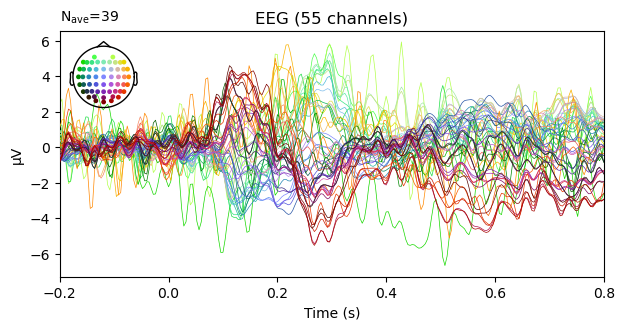

In [35]:
epochs_rereferenced["go"].average().plot(spatial_colors=True)

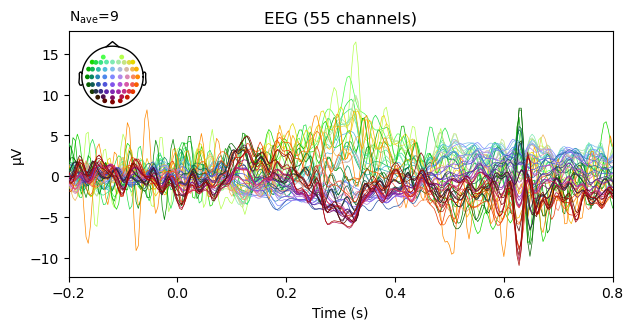

In [36]:
epochs_rereferenced["no-go"].average().plot(spatial_colors=True)

### Ahora calculemos el Evoked para el promedio de los electrodos para cada condición
<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li> Crearemos una variable llamada "average_go" en la que calcularemos el promedio ("average()") de las epocas rereferenciadas especificamente para la condición Go. </li>
    <li> Crearemos una variable llamada "average_no_go" en la que calcularemos el promedio ("average()") de las epocas rereferenciadas especificamente para la condición No-Go. </li>
    <li> Realizamos la compración entre los ERPs de la condición Go y No-Go </li>
    </ul>
    <br>
    <i>tips</i>:
    <ul>
    <li> <i>La función "mne.viz.plot_compare_evokeds" sirve para comparar ERPs</i></li>
    <li> <i>Es importante asignar como argumento de dicha función un diccionario que incluya average_go y average_no_go</i></li>
    </ul>
</div>

In [37]:
average_go = epochs_rereferenced["go"].average()
average_no_go = epochs_rereferenced["no-go"].average()
mne.viz.plot_compare_evokeds(dict(Go=average_go, NoGo=average_no_go),
                             legend='upper left', show_sensors='upper right')

combining channels using "gfp"
combining channels using "gfp"


[<Figure size 800x600 with 2 Axes>]

### Analizar Regiones de Interés (ROIs): promedio entre canales

Ahora vamos a realizar 2 clusters de 6 electrodos.\
 Vamos a generar un **cluster frontal** (los 6 electrodos alrededor de Fz) y un **cluster posterior** (los 6 electrodos alrededor de Pz).

 <div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
    <li> En las variables "frontal" y "posterior" crearemos listas donde que pondrán los canales que correpsonden a cada cluster. </li>
    <li> Al momento de comparar ERPs, esta vez pasaremos como argumento "picks" las listas de canales creadas (i.e. frontal y posterior). De esta forma podremos subsetear según ROIs </li>
    </ul>
    <br>
</div> 

In [38]:
frontal = ['F1', 'Fz', 'F2', 'FC1', 'FCz', 'FC2']
posterior = ['P1', 'Pz', 'P2', 'PO3', 'POz', 'PO4']

evokeds = dict(Go=list(epochs_rereferenced['go'].iter_evoked()),
               NoGo=list(epochs_rereferenced['no-go'].iter_evoked()))

In [39]:
mne.viz.plot_compare_evokeds(evokeds, picks=frontal, combine='mean')

combining channels using "mean"
combining channels using "mean"


[<Figure size 800x600 with 1 Axes>]

In [40]:
mne.viz.plot_compare_evokeds(evokeds, picks=posterior, combine='mean')

combining channels using "mean"
combining channels using "mean"


[<Figure size 800x600 with 1 Axes>]

# Decoding

Hasta acá estuvimos haciendo análisis "clásicos" de EEG, a partir de los cuales intentamos caracterizar la respuesta cerebral de los participantes de acuerdo a lo estímulos visuales que se le presentaron (cue 'Go' o 'No-Go').

Ahora vamos a hacer lo opuesto. Vamos a intentar **decodificar** (i.e. clasificar de forma automática) qué estímulo vio el participante a partir de sus señales cerebrales. Esto se lo conoce como *Decoding*.

De este modo, vamos a hacer una clasificación binaria (cue 'Go' vs. 'No-Go') utilizando algoritmos clásicos de la librería [Scikit-Learn](https://scikit-learn.org/stable/), e.g. Regresión Logística, SVM y Random Forestest. Con este fin podríamos utilizar también Deep Learning.\
Para este ejercicio vamos a uitilizar el algoritmo [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random+forest).

Para comenzar con la práctica de *Decoding*, vamos a importar los módulos necesarios:

In [51]:
from mne.decoding import (SlidingEstimator, GeneralizingEstimator, Scaler, Vectorizer, cross_val_multiscore)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_auc_score

Luego de haber importado los módulos necesarios, el primer paso es armar las matrices de datos para el clasificador.\
Para esto no vamos computar *features*, sino que vamos a utilizar directamente la data prepreocesada (limpia).

In [52]:
X = epochs_rereferenced.get_data()  # EEG signals: n_epochs, n_eeg_channels, n_times
y = epochs_rereferenced.events[:, 2]  # target: go vs nogo

### Armado de *Pipeline* de clasificación

La clase [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) de scikit-learn nos permite aplicar una serie de transformaciones a un conjunto de datos, y al final aplicar un estimador.

La primera de estas transformaciones a aplicar en nuestros datos será una estandarización a través de 'Scaler'. Luego, el segundo paso será vectorizar ('Vectorizer'), el cual nos permite que nuestra matriz de features X (en nuestro caso una unica variable con los datos limpios y preprocesados de EEG) sea utilizable dentro de Scikit-learn.

Finalmente, como último paso, seteamos el algoritmo de clasificación a utilizar. En este caso, el algoritmo será Random Forest. 

*Nota 1:* Si bien es una buena practica optimizar hiperparámetros del algortimo para buscar una mejor performance del modelo, en este caso se utilizará la configuración de hiperparámetros por default del mismo.

*Nota 2:* Se podría aplicar también otros pasos intermedios en el Pipeline. Por ejemplo, para reducir la dimensionalidad de la matriz de features (previo a aplicar el estimador) con métodos como Analisis de Componentes Principales (PCA).


In [43]:
clf = make_pipeline(
    Scaler(epochs_rereferenced.info, scalings='mean'),
    Vectorizer(),
    RandomForestClassifier(random_state = 42)
)

### Validación cruzada

Luego, para evitar subre ajuste (*over-fitting*) vamos a utilizar [K-fold cross-validation](https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/DeepLearning/5_Evaluacion_Modelos/2_Seleccion_Modelos.ipynb#scrollTo=Rx7BgvZndOmD).

Con este fin MNE ya nos provee de un método para realizar la validación cruzada y obtener además una performance: [cross_val_multiscore](https://mne.tools/dev/generated/mne.decoding.cross_val_multiscore.html)

In [60]:
scores = cross_val_multiscore(clf, X, y, cv=5, n_jobs=1, scoring = 'roc_auc')

# Mean scores across cross-validation splits
score = np.mean(scores, axis=0)
print('Clasificacion AUC: %0.1f%%' % (100 * score,))

Clasificacion AUC: 69.1%


### 

<div class="alert alert-success">
    <b>Ejercicio (teórico)</b>:
     <ul>
    <li>¿Cómo interpretamos este resultado?</li>
    </ul>
    <br>
    <i>Considerar</i>:
    <ul>
    <li> Performance obtenida
</li>
    <li> Cantidad de clases en la clasificación
</li>
    <li> Métrica de performance utilizada
</li>
    </ul>
</div>



### Test de Permutaciones

¿Cómo sabemos si la clasificación obtenida es significativa o es producto del azar?
Una forma de testear esto es volver a correr nuestro clasificador muchas veces (e.g. 1000 veces), pero con las etiquetas de 'Go' y 'No Go' mezcladas. Luego, tenemos que ver si *nuestro* clasificador original tiene una mejor performance que la mayor parte (>95%) de los clasificadores "random" que generamos.
A esto se lo conoce como Test de Permutaciones. 

-----------------------------------------

<div class="alert alert-success">
    <b>Ejercicio</b>: Hacer un test de permutaciones para evaluar si la performance de nuestro modelo fue significativa
     <ul>
    </ul>
    <br>
    <i>Tips</i>:
    <ul>
    <li>Utilizar la función [permutation_test_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.permutation_test_score.html) </li>
    </ul>
</div>

In [61]:
# Resolver ejercicio de Test de Permutaciones

### **Extra:** Temporal Decoding
Al realizar decoding con EEG, nuestro interés no es únicamente  encontrar un modelo que maximice la performance en la tarea, sino también mejorar la comprensión teórica del fenómeno a estudiar.

De este modo, una pregunta que podemos hacernos **es qué momento** de la presentación del estimulo, nuestro clasificador logra distintuir entre ambas etiquetas por encima del azar. 

Se conoce como *Temporal Decoding* a implementar un clasificador y testearlo para cada punto del tiempo, para poder observar así cómo varía en el tiempo la perfromance de nuestro clasificador.
Así, el primer momento en qué el clasificador se diferencia del azar podría explicar en qué momento nuestro sistema nervioso diferencia entre ambos tipos de estímulos.

Para poder hacer Temporal Decoding, vamos a utilizar la función [SlidingEstimator](https://mne.tools/dev/generated/mne.decoding.SlidingEstimator.html) de MNE.

In [63]:
time_decod = SlidingEstimator(clf, n_jobs=1, scoring='roc_auc', verbose=True)

# Acá usamos cv=3 por una cuestión de velocidad. 
scores_cv = cross_val_multiscore(time_decod, X, y, cv=3, n_jobs=1)

# Calculamos la media a través de las CrossValidation scores
scores = np.mean(scores_cv, axis=0)

100%|██████████| Fitting SlidingEstimator : 251/251 [00:33<00:00,    7.53it/s]
100%|██████████| Fitting SlidingEstimator : 251/251 [00:33<00:00,    7.38it/s]
100%|██████████| Fitting SlidingEstimator : 251/251 [00:34<00:00,    7.19it/s]


In [62]:
# Plot
fig, ax = plt.subplots()
ax.plot(epochs.times, scores, label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')  # Area Under the Curve
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Sensor space decoding')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (251,) and (5,)

### **Extra 2:** Temporal Generalization

Felicitaciones! Juntxs pudimos hacer Temporal Decoding.

Sin embargo, otra pregunta qué nos surgió es qué tanto se puede generalizar esa decodificación temporal.

En concreto, ¿La predicción en el punto n, que tanto generaliza al punto n+1, n+2, ..., n+m?

In [47]:
# define the Temporal generalization object
time_gen = GeneralizingEstimator(clf, n_jobs=1, scoring='roc_auc',
                                 verbose=True)

# again, cv=3 just for speed
scores = cross_val_multiscore(time_gen, X, y, cv=3, n_jobs=1)

# Mean scores across cross-validation splits
scores = np.mean(scores, axis=0)

# Plot the diagonal (it's exactly the same as the time-by-time decoding above)
fig, ax = plt.subplots()
ax.plot(epochs.times, np.diag(scores), label='score')
ax.axhline(.5, color='k', linestyle='--', label='chance')
ax.set_xlabel('Times')
ax.set_ylabel('AUC')
ax.legend()
ax.axvline(.0, color='k', linestyle='-')
ax.set_title('Decoding MEG sensors over time')

100%|██████████| Fitting GeneralizingEstimator : 251/251 [00:29<00:00,    8.46it/s]
100%|██████████| Scoring GeneralizingEstimator : 63001/63001 [12:11<00:00,   86.07it/s]
100%|██████████| Fitting GeneralizingEstimator : 251/251 [00:29<00:00,    8.54it/s]
100%|██████████| Scoring GeneralizingEstimator : 63001/63001 [12:16<00:00,   85.52it/s]
100%|██████████| Fitting GeneralizingEstimator : 251/251 [00:29<00:00,    8.50it/s]
100%|██████████| Scoring GeneralizingEstimator : 63001/63001 [12:11<00:00,   86.12it/s]


Text(0.5, 1.0, 'Decoding MEG sensors over time')

In [50]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(scores, interpolation='lanczos', origin='lower', cmap='RdBu_r',
               extent=epochs.times[[0, -1, 0, -1]], vmin=0., vmax=1.)
ax.set_xlabel('Testing Time (s)')
ax.set_ylabel('Training Time (s)')
ax.set_title('Temporal generalization')
ax.axvline(0, color='k')
ax.axhline(0, color='k')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('AUC')
plt.show()

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none
Channels marked as bad:
none


## **FIN**

¡Hemos llegado al final de este tutorial!

Es importante remarcar que esto fue hecho para **un solo sujeto**. 
En caso de querer evaluar inter-sujeto sería necesario hacer los análisis con todos los participantes juntos para ganar poder estadístico y mejorar la performance de nuestros clasificadores.

*¿Creen que podrían entrenar un modelo inter-sujeto?*